![lop](../../images/logo_diive1_128px.png)
# **ICOS: Compare uploaded to local precipitation data**

**Notebook creation date**: 23 Apr 2023  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)
---
Example notebook for reading ICOS data files with the time series processing library `diive`.

# Background

- Check if uploaded ICOS BM raw data are the same as local data
- ICOS BM files contain raw bio-meteorological data, in this case e.g. precipitation

# Using pre-defined filetype `ICOS_H1R_CSVZIP_1MIN`
- This filetype is pre-defined
- It has a 1-row header section with variable names
- It is a zipped `csv` file
- Time resolution is 1MIN
- Timestamp is in the first column and has the format `%Y%m%d%H%M%S`, showing the END of the averaging interval
- Timestamp is converted to show the MIDDLE of the averaging interval during reading

# Imports

In [21]:
import pandas as pd
from diive.core.io.filereader import MultiDataFileReader, search_files

# Source folders
- All files were collected in the respective folder

In [2]:
UPLOADED_FILES = r"F:\Sync\luhk_work\_current\icos_compare_precip_uploaded_vs_local\uploaded"
LOCAL_FILES = r"F:\Sync\luhk_work\_current\icos_compare_precip_uploaded_vs_local\local"

In [3]:
filepaths_uploaded = search_files(UPLOADED_FILES, "*.zip")
filepaths_local = search_files(LOCAL_FILES, "*.zip")

# Read all files in folder
All files are automatically merged in this step.

In [4]:
uploaded = MultiDataFileReader(filetype='ICOS-H1R-CSVZIP-1MIN', filepaths=filepaths_uploaded)

Reading file CH-Dav_BM_20200103_L22_F03.zip ...
Reading file CH-Dav_BM_20200104_L22_F03.zip ...
Reading file CH-Dav_BM_20200105_L22_F03.zip ...
Reading file CH-Dav_BM_20200106_L22_F03.zip ...
Reading file CH-Dav_BM_20200107_L22_F03.zip ...
Reading file CH-Dav_BM_20200108_L22_F03.zip ...
Reading file CH-Dav_BM_20200109_L22_F03.zip ...
Reading file CH-Dav_BM_20200110_L22_F03.zip ...
Reading file CH-Dav_BM_20200111_L22_F03.zip ...
Reading file CH-Dav_BM_20200112_L22_F03.zip ...
Reading file CH-Dav_BM_20200113_L22_F03.zip ...
Reading file CH-Dav_BM_20200114_L22_F03.zip ...
Reading file CH-Dav_BM_20200115_L22_F03.zip ...
Reading file CH-Dav_BM_20200116_L22_F03.zip ...
Reading file CH-Dav_BM_20200117_L22_F03.zip ...
Reading file CH-Dav_BM_20200118_L22_F03.zip ...
Reading file CH-Dav_BM_20200119_L22_F03.zip ...
Reading file CH-Dav_BM_20200120_L22_F03.zip ...
Reading file CH-Dav_BM_20200121_L22_F03.zip ...
Reading file CH-Dav_BM_20200122_L22_F03.zip ...
Reading file CH-Dav_BM_20200123_L22_F03.

In [5]:
local = MultiDataFileReader(filetype='ICOS-H1R-CSVZIP-1MIN', filepaths=filepaths_local)

Reading file CH-Dav_BM_20200103_L22_F03.zip ...
Reading file CH-Dav_BM_20200104_L22_F03.zip ...
Reading file CH-Dav_BM_20200105_L22_F03.zip ...
Reading file CH-Dav_BM_20200106_L22_F03.zip ...
Reading file CH-Dav_BM_20200107_L22_F03.zip ...
Reading file CH-Dav_BM_20200108_L22_F03.zip ...
Reading file CH-Dav_BM_20200109_L22_F03.zip ...
Reading file CH-Dav_BM_20200110_L22_F03.zip ...
Reading file CH-Dav_BM_20200111_L22_F03.zip ...
Reading file CH-Dav_BM_20200112_L22_F03.zip ...
Reading file CH-Dav_BM_20200113_L22_F03.zip ...
Reading file CH-Dav_BM_20200114_L22_F03.zip ...
Reading file CH-Dav_BM_20200115_L22_F03.zip ...
Reading file CH-Dav_BM_20200116_L22_F03.zip ...
Reading file CH-Dav_BM_20200117_L22_F03.zip ...
Reading file CH-Dav_BM_20200118_L22_F03.zip ...
Reading file CH-Dav_BM_20200119_L22_F03.zip ...
Reading file CH-Dav_BM_20200120_L22_F03.zip ...
Reading file CH-Dav_BM_20200121_L22_F03.zip ...
Reading file CH-Dav_BM_20200122_L22_F03.zip ...
Reading file CH-Dav_BM_20200123_L22_F03.

# Results

In [6]:
df_uploaded = uploaded.data_df
df_uploaded

,P_1_1_1,RH_1_6_2,TA_1_6_2
TIMESTAMP_MIDDLE,,,
2020-01-03 00:01:30,0.0,49.5,-0.7
2020-01-03 00:02:30,0.0,49.8,-0.9
2020-01-03 00:03:30,0.0,51.2,-1.1
2020-01-03 00:04:30,0.0,54.6,-1.6
2020-01-03 00:05:30,0.0,56.6,-1.8
...,...,...,...
2020-12-31 23:55:30,0.0,62.2,-7.7
2020-12-31 23:56:30,0.0,61.9,-7.7
2020-12-31 23:57:30,0.0,62.9,-7.8


In [7]:
df_local = local.data_df
df_local

,P_1_1_1,RH_1_6_2,TA_1_6_2
TIMESTAMP_MIDDLE,,,
2020-01-03 00:01:30,0.0,49.5,-0.7
2020-01-03 00:02:30,0.0,49.8,-0.9
2020-01-03 00:03:30,0.0,51.2,-1.1
2020-01-03 00:04:30,0.0,54.6,-1.6
2020-01-03 00:05:30,0.0,56.6,-1.8
...,...,...,...
2020-12-31 23:55:30,0.0,62.2,-7.7
2020-12-31 23:56:30,0.0,61.9,-7.7
2020-12-31 23:57:30,0.0,62.9,-7.8


## Collect all precipitation data in one dataframe

In [11]:
prec_uploaded = df_uploaded['P_1_1_1'].copy()
prec_uploaded.name = 'uploaded'
prec_local = df_local['P_1_1_1'].copy()
prec_local.name = 'local'
prec_df = pd.concat([prec_uploaded, prec_local], axis=1) 
prec_df

,uploaded,local
TIMESTAMP_MIDDLE,,
2020-01-03 00:01:30,0.0,0.0
2020-01-03 00:02:30,0.0,0.0
2020-01-03 00:03:30,0.0,0.0
2020-01-03 00:04:30,0.0,0.0
2020-01-03 00:05:30,0.0,0.0
...,...,...
2020-12-31 23:55:30,0.0,0.0
2020-12-31 23:56:30,0.0,0.0
2020-12-31 23:57:30,0.0,0.0


In [14]:
prec_df = prec_df.dropna()

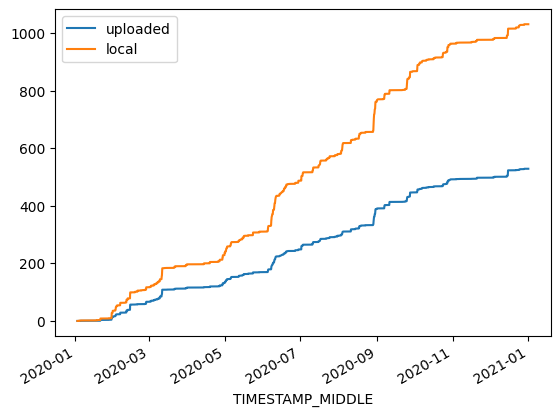

In [19]:
prec_df.cumsum().plot();

# Conclusions
- the two precipitation time series do not match
- uploaded data are clearly different from local data

# Finish

In [20]:
from datetime import datetime
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2023-04-23 20:18:53
